In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Dataset shape:", X.shape)

Dataset shape: (150, 4)


In [7]:
pd.concat([X, y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

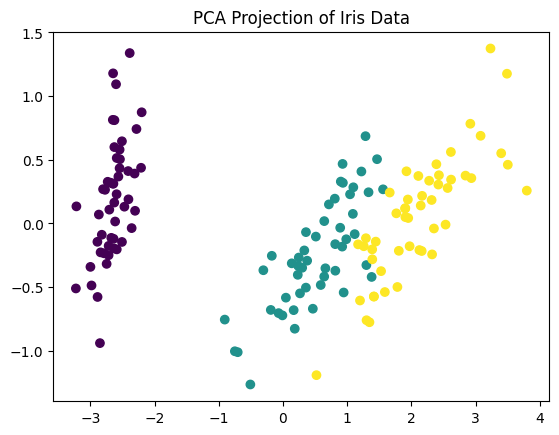

In [3]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Projection of Iris Data")
plt.show()

In [4]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

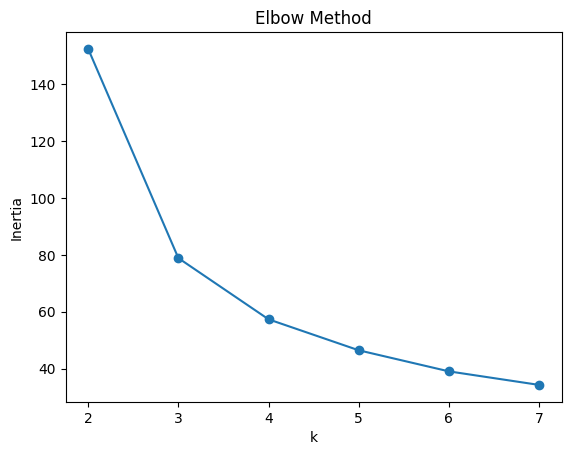

In [5]:
# X = pd.read_csv("X_cluster.csv")

# Elbow Method for KMeans
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
# plt.savefig("elbow_plot.png")
plt.show()

In [6]:
# Train final models
km = KMeans(n_clusters=3, random_state=42).fit(X)
hc = AgglomerativeClustering(n_clusters=3).fit(X)

print("KMeans Silhouette:", silhouette_score(X, km.labels_))
print("Agglomerative Silhouette:", silhouette_score(X, hc.labels_))

KMeans Silhouette: 0.551191604619592
Agglomerative Silhouette: 0.5543236611296419


In [16]:
km_clusters = pd.Series(km.labels_, name="km_labels")
pd.concat([X, km_clusters],axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),km_labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


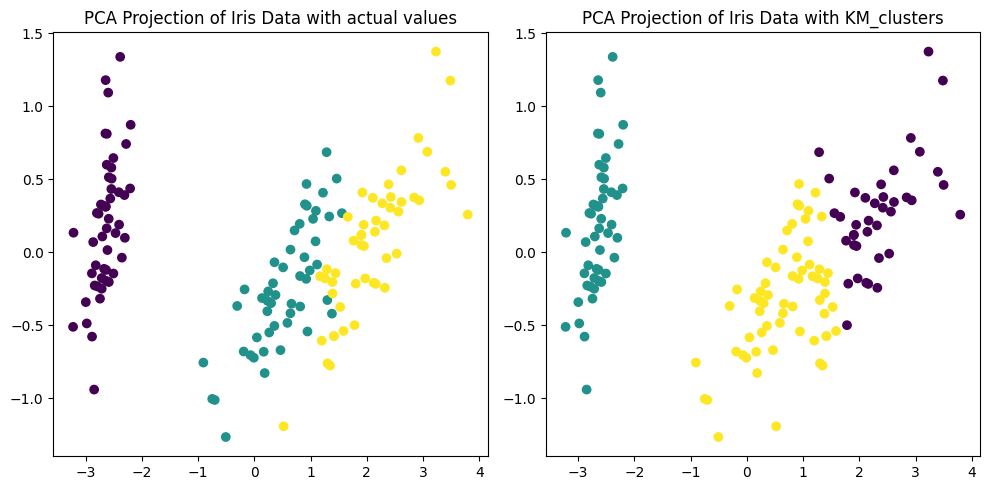

In [20]:
from matplotlib import gridspec
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA Projection of Iris Data with actual values")

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=km_clusters)
ax2.set_title("PCA Projection of Iris Data with KM_clusters")

plt.tight_layout()
plt.show()

In [24]:
hc_clusters = pd.Series(hc.labels_, name="hc_labels")
pd.concat([X, hc_clusters],axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),hc_labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


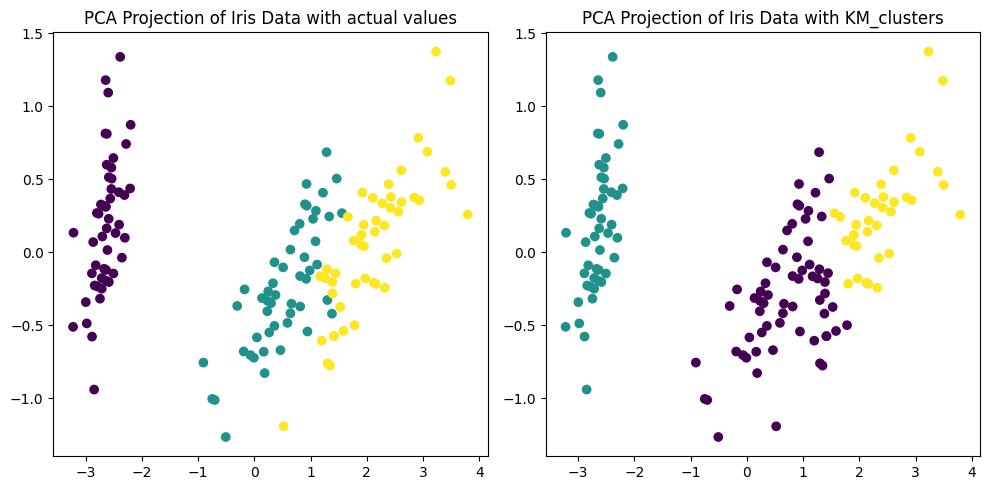

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA Projection of Iris Data with actual values")

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_clusters)
ax2.set_title("PCA Projection of Iris Data with KM_clusters")

plt.tight_layout()
plt.show()

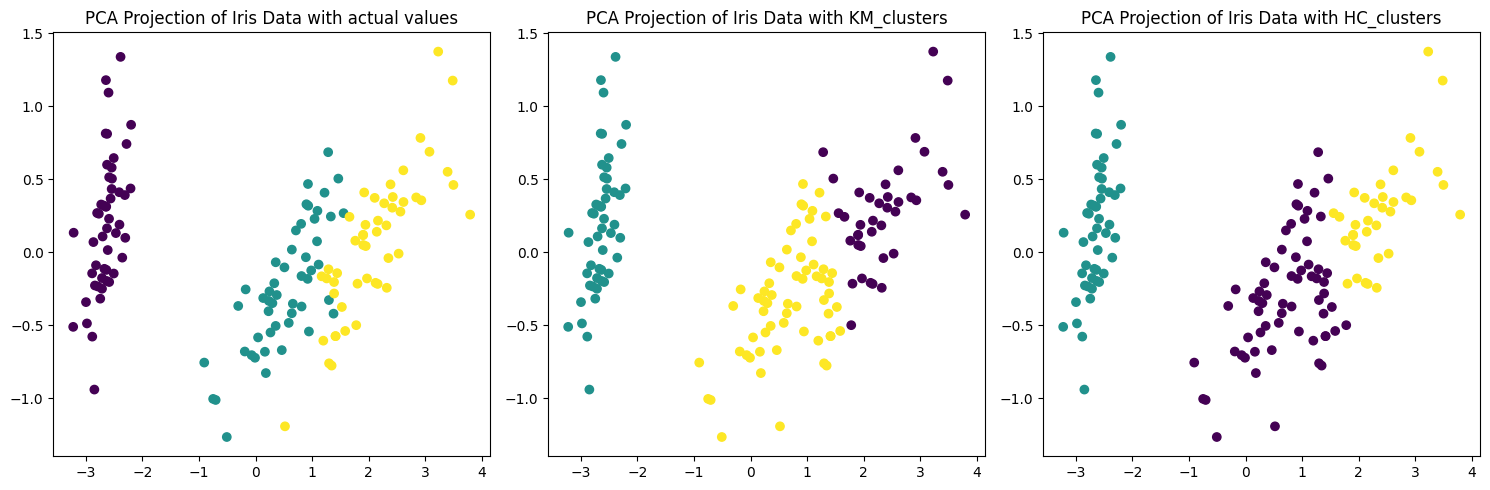

In [28]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax0.set_title("PCA Projection of Iris Data with actual values")

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=km_clusters)
ax1.set_title("PCA Projection of Iris Data with KM_clusters")

ax2 = fig.add_subplot(gs[0, 2])
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_clusters)
ax2.set_title("PCA Projection of Iris Data with HC_clusters")

plt.tight_layout()
plt.show()